In [1]:
import importlib
import numpy as np
import rgrow
import matplotlib.pyplot as plt


In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
a = np.array([[2, 1, 2, 1, 2, 1, 2],
       [1, 2, 1, 2, 1, 2, 1],
       [2, 1, 2, 1, 2, 1, 2],
       [1, 2, 1, 2, 1, 2, 1],
       [2, 1, 2, 1, 2, 1, 2],
       [1, 2, 1, 2, 1, 2, 1],
       [2, 1, 2, 1, 2, 1, 2]], dtype=np.uint64)


c = np.zeros((32, 32), dtype='uint'); c[3:10, 3:10] = a

te = np.array([[0, 0, 0, 0], [1, 1, 2, 2], [2, 2, 1, 1]], dtype='uint')

tc = np.array([0, 100e-9, 100e-9])

gs = np.array([0.0, 1.0, 1.0])

gs

array([0., 1., 1.])

In [4]:
c = np.zeros((32, 32), dtype='uint'); c[1, 1] = 1

te = np.array([[0, 0, 0, 0], [0, 1, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]], dtype='uint')

tc = np.array([0, 100e-9, 100e-9])

gs = np.array([0.0, 2.0, 2.0])

gs

array([0., 2., 2.])

In [5]:
importlib.reload(rgrow)


<module 'rgrow' from '/home/cgke/myriad/software/pyrgrow/venv-pyrgrow/lib64/python3.8/site-packages/rgrow.cpython-38-x86_64-linux-gnu.so'>

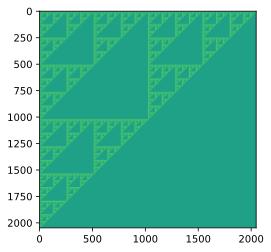

In [6]:
ns = 11
c = np.zeros((2**ns, 2**ns), dtype='uint32'); c[1, 1] = 1

te = np.array([[0, 0, 0, 0], 
               [0, 1, 1, 0], 
               [0, 1, 3, 1], 
               [1, 3, 1, 0],
               [2, 2, 2, 2],
               [3, 3, 3, 2],
               [2, 3, 3, 3],
               [3, 2, 2, 3]], dtype='uint32')

tc = np.array([0, 1, 1, 1, 1, 1, 1, 1], dtype='float')

gs = np.array([0.0, 2.0, 1, 1])

gs

gse = 2
s = rgrow.PyStaticATAM(tc, te, gs, 2.0)
g = rgrow.PyStateATAM(c, s)
g.evolve_in_size_range(s, 0, (2**ns - 2)**2, 5000000)
plt.imshow(g.to_array())
s2 = g.to_array()[0:10,0:10]

In [7]:
ns = 9
c = np.zeros((2**ns, 2**ns), dtype='uint'); c[1, 1] = 1
c[1:1+s2.shape[0],1:1+s2.shape[1]] = s2

In [8]:
print("["+"],\n[".join(", ".join(str(y) for y in x) for x in list(s2)) + "]")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 2, 2, 2, 2, 2, 2, 2, 2],
[0, 3, 7, 5, 7, 5, 7, 5, 7, 5],
[0, 3, 6, 7, 4, 5, 6, 7, 4, 5],
[0, 3, 7, 4, 4, 5, 7, 4, 4, 5],
[0, 3, 6, 6, 6, 7, 4, 4, 4, 5],
[0, 3, 7, 5, 7, 4, 4, 4, 4, 5],
[0, 3, 6, 7, 4, 4, 4, 4, 4, 5],
[0, 3, 7, 4, 4, 4, 4, 4, 4, 5],
[0, 3, 6, 6, 6, 6, 6, 6, 6, 7]


In [ ]:
ns = 9
c = np.zeros((2**ns, 2**ns), dtype='uint32');
c[1:1+s2.shape[0],1:1+s2.shape[1]] = s2
te = np.array([[0, 0, 0, 0], 
               [0, 1, 1, 0], 
               [0, 1, 3, 1], 
               [1, 3, 1, 0],
               [2, 2, 2, 2],
               [3, 3, 3, 2],
               [2, 3, 3, 3],
               [3, 2, 2, 3]], dtype='uint32')

tc = np.array([0, 1, 1, 1, 1, 1, 1, 1], dtype='float')

gs = np.array([0.0, 2.0, 1, 1])

gs

gse = 5.4
s = rgrow.PyStaticKTAM(tc, te, gs, gse, gmc=10.6)
g = rgrow.PyStateKTAM(c, s)
g.evolve_in_size_range(s, 1, 100000, 50000000)
plt.imshow(g.to_array())


In [60]:
c  =np.zeros((64, 64), dtype='uint')
c[1:11,1:11] = smaps['amap'][0:10,0:10]+1

Gse = 10.5

cv = np.array([0] + [100e-9]*917)

sys = rgrow.PyStaticKTAM.from_raw(cv, JmatN.T*Gse, JmatE*Gse)


In [61]:
JmatE[1][2]

1.0

In [62]:
g = rgrow.PyStateKTAM(c, sys)

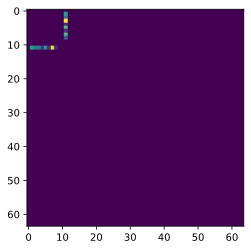

In [63]:
plt.imshow(g.rates(0))

In [66]:
g.evolve_in_size_range(sys, 1, 480, 50000)

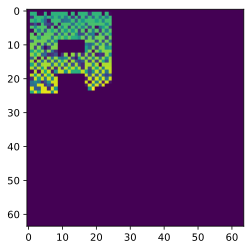

In [67]:
plt.imshow(g.to_array())

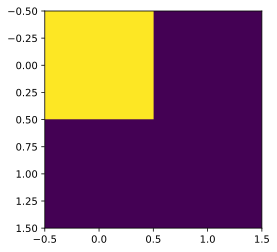

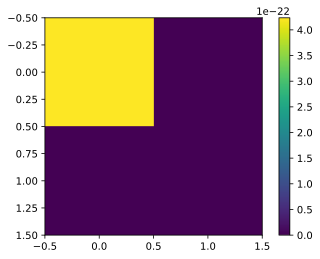

In [28]:
n = 3
q = g.rates(n)
plt.imshow(q[::2, ::2] + q[1::2, ::2] + q[::2, 1::2] + q[1::2, 1::2])
plt.figure()
plt.imshow(q[::2, ::2] + q[1::2, ::2] + q[::2, 1::2] + q[1::2, 1::2] - g.rates(n+1))
plt.colorbar()